In [5]:
from emotion_recognition import EmotionRecognizer
from sklearn.ensemble import BaggingClassifier
# init a model, let's use SVC
my_model = BaggingClassifier()
# pass my model to EmotionRecognizer instance
# and balance the dataset
rec = EmotionRecognizer(model=my_model, emotions=['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'ps' , 'boredom'], balance=False, verbose=0)
# train the model
rec.train()
# check the test accuracy for that model
print("Test score:", rec.test_score())
# check the train accuracy for that model
print("Train score:", rec.train_score())

#'angry': 1, 'fear': 2, 'disgust': 3, 'sad': 4, 'boredom': 5, 'neutral': 6, 'calm': 7, 'happy': 8, 'ps': 9

[+] Model trained
Test score: 1.0
Train score: 1.0


In [6]:
# loads the best estimators from `grid` folder that was searched by GridSearchCV in `grid_search.py`,
# and set the model to the best in terms of test score, and then train it
rec.determine_best_model()
# get the determined sklearn model name
print(rec.model.__class__.__name__, "is the best")
# get the test accuracy score for the best estimator
print("Test score:", rec.test_score())

SVC is the best
Test score: 1.0


In [8]:
# this is a neutral speech from emo-db from the testing set
print("Prediction:", rec.predict("data/emodb/wav/15a04Nc.wav"))
# this is a sad speech from TESS from the testing set
print("Prediction:", rec.predict("data/validation/Actor_25/25_01_01_01_back_sad.wav"))

Prediction: neutral
Prediction: fear


c:\Users\akank\OneDrive\Desktop\emotiondetect10\utils.py:93: FutureWarning: Pass y=[ 1.0375977e-03  6.7138672e-04  7.9345703e-04 ...  9.1552734e-05
 -9.1552734e-05 -3.3569336e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
c:\Users\akank\OneDrive\Desktop\emotiondetect10\utils.py:93: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  6.1035156e-05
  1.2207031e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [16]:
from emotion_recognition import EmotionRecognizer
from sklearn.neighbors import KNeighborsClassifier
# initialize instance, this will take a bit the first time executed
# as it'll extract the features and calls determine_best_model() automatically
# to load the best performing model on the picked dataset
my_model = KNeighborsClassifier()
rec = EmotionRecognizer(model = my_model, emotions=['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'ps' , 'boredom'], balance=False, verbose=1, custom_db=True)
rec.train()
# it will be trained, so no need to train this time
# get the accuracy on the test set

[Custom Dataset] Total files to write: 4775
[Custom Dataset] There are 4775 training audio files for category:neutral
[Custom Dataset] Total files to write: 9550
[Custom Dataset] There are 4775 training audio files for category:calm
[Custom Dataset] Total files to write: 14325
[Custom Dataset] There are 4775 training audio files for category:happy
[Custom Dataset] Total files to write: 19100
[Custom Dataset] There are 4775 training audio files for category:sad
[Custom Dataset] Total files to write: 23875
[Custom Dataset] There are 4775 training audio files for category:angry
[Custom Dataset] Total files to write: 28650
[Custom Dataset] There are 4775 training audio files for category:fear
[Custom Dataset] Total files to write: 33425
[Custom Dataset] There are 4775 training audio files for category:disgust
[Custom Dataset] Total files to write: 38200
[Custom Dataset] There are 4775 training audio files for category:ps
[Custom Dataset] Total files to write: 42975
[Custom Dataset] There a

In [17]:
print(rec.confusion_matrix())
# predict angry audio sample
prediction = rec.predict('data/validation/Actor_10/03-02-05-02-02-02-10_angry.wav')
print(f"Prediction: {prediction}")

              predicted_neutral  predicted_calm  predicted_happy  \
true_neutral              100.0             0.0              0.0   
true_calm                   0.0           100.0              0.0   
true_happy                  0.0             0.0            100.0   
true_sad                    0.0             0.0              0.0   
true_angry                  0.0             0.0              0.0   
true_fear                   0.0             0.0              0.0   
true_disgust                0.0             0.0              0.0   
true_ps                     0.0             0.0              0.0   
true_boredom                0.0             0.0              0.0   

              predicted_sad  predicted_angry  predicted_fear  \
true_neutral            0.0              0.0             0.0   
true_calm               0.0              0.0             0.0   
true_happy              0.0              0.0             0.0   
true_sad              100.0              0.0             0.0   

In [18]:
rec.get_samples_by_class()

,train,test,total
neutral,2841,2334,5175
calm,960,768,1728
happy,3281,2686,5967
sad,3235,2651,5886
angry,3561,2910,6471
fear,3271,2678,5949
disgust,3156,2586,5742
ps,2926,2402,5328
boredom,405,324,729
total,23636,19339,42975


[+] Model trained
[+] SVC with 1.0% (236) data samples achieved 99.894% Validation Score in 0.007s & 64.249% Test Score in 0.004s
[+] Model trained
[+] SVC with 10.0% (2363) data samples achieved 99.894% Validation Score in 0.491s & 86.963% Test Score in 0.318s
[+] Model trained
[+] SVC with 100% (23636) data samples achieved 99.894% Validation Score in 13.945s & 100.000% Test Score in 12.107s

[+] Model trained
[+] RandomForestClassifier with 1.0% (236) data samples achieved 79.751% Validation Score in 0.046s & 64.249% Test Score in 0.004s
[+] Model trained
[+] RandomForestClassifier with 10.0% (2363) data samples achieved 79.751% Validation Score in 0.170s & 76.668% Test Score in 0.015s
[+] Model trained
[+] RandomForestClassifier with 100% (23636) data samples achieved 79.751% Validation Score in 1.017s & 80.506% Test Score in 0.157s

[+] Model trained
[+] GradientBoostingClassifier with 1.0% (236) data samples achieved 99.937% Validation Score in 3.428s & 62.694% Test Score in 0.00

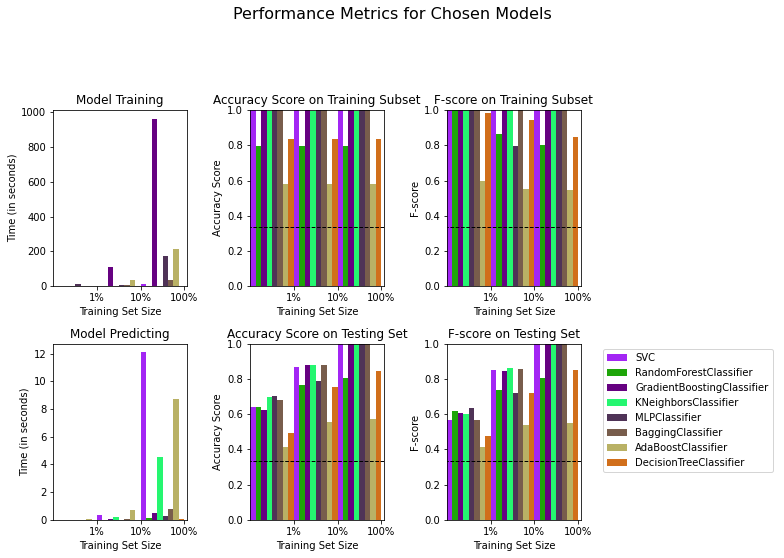

In [19]:
from emotion_recognition import plot_histograms
# plot histograms on different classifiers
plot_histograms(classifiers=True)

In [22]:
import pickle
with open('grid/best_classifiers.pickle', 'rb') as c:
    x = pickle.load(c)
    print(x)

[(SVC(C=10, gamma=0.001), {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 0.9989423361678723), (RandomForestClassifier(max_depth=7, max_features=2, min_samples_leaf=2,
                       n_estimators=70), {'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 70}, 0.7975124423315441), (GradientBoostingClassifier(learning_rate=0.3, max_depth=7, subsample=1), {'learning_rate': 0.3, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1}, 0.9993653211474993), (KNeighborsClassifier(n_neighbors=9, p=1, weights='distance'), {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}, 0.9978846186335955), (MLPClassifier(alpha=0.01, batch_size=128, hidden_layer_sizes=(256, 256),
              learning_rate='adaptive', max_iter=700), {'alpha': 0.01, 'batch_size': 128, 'hidden_layer_sizes': (256, 256), 'learning_rate': 'adaptive', 'max_iter': 700}, 0.9987307765503722), (BaggingClassifier(max_featu